In [7]:
from utils_filter import *
from utils_datetime import *
from utils_plotting import *
from datetime import timedelta

In [4]:
data_location = 'data'
moderate = False # only consider moderate days
outlooks, pph, reports = read_datasets(data_location, moderate)



reading outlooks 1
reading outlooks 2


c:\Users\miles\OneDrive\Documents\UW\Research\utils_filter.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlooks = outlooks.append(gp.read_file(data_location + '/outlooks/' + mod_string + '_outlooks_2.shp'))


reading pph
reading storm reports


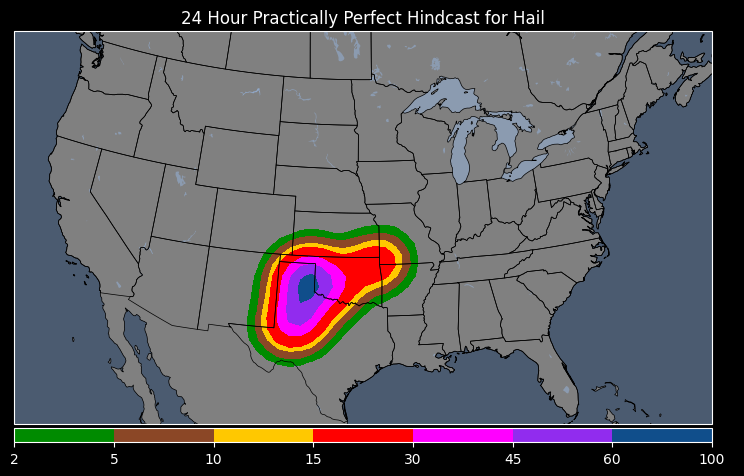

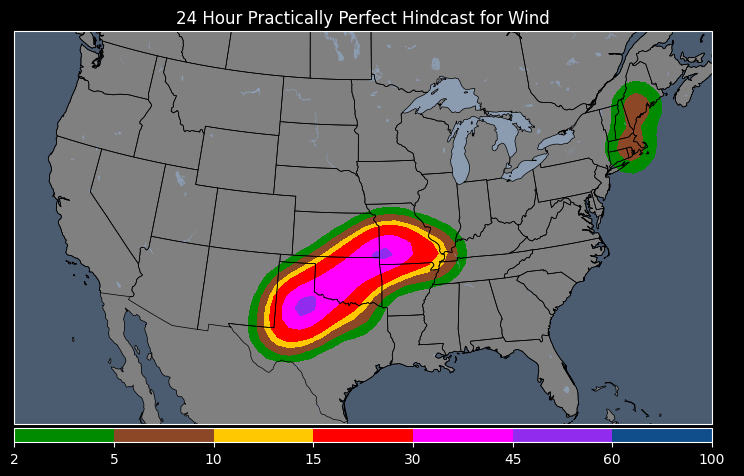

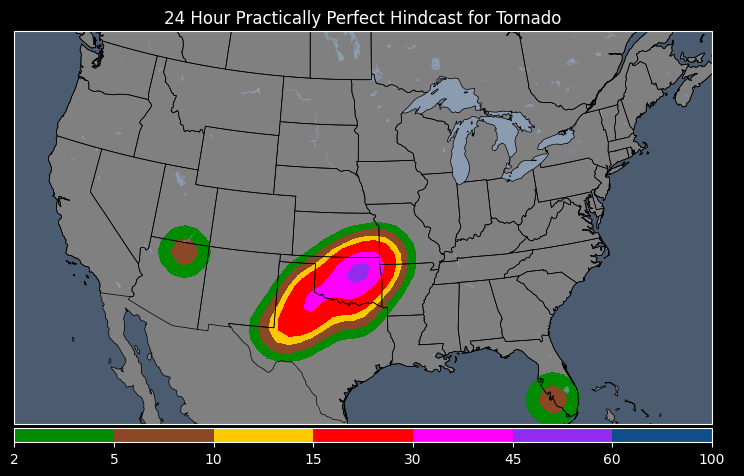

In [23]:
output_location = 'plots/daily/20190520'
categories = ['hail', 'wind', 'tor']
pph_day = pph.loc[dict(time = '2019-05-20T12:00:00')]
plot_pph_day_temp(pph_day, output_location, categories, show = True)

In [6]:
outlooks[outlooks['DATE'] == '201804020000']

,ISSUE,EXPIRE,PRODISS,TYPE,DAY,THRESHOLD,CATEGORY,CYCLE,DATE,geometry
95043,201804021200,201804031200,201804010551,C,2,TSTM,CATEGORICAL,7,201804020000,"POLYGON ((-95.36000 39.01000, -96.30000 39.790..."
95051,201804021200,201804031200,201804011717,C,2,TSTM,CATEGORICAL,17,201804020000,"POLYGON ((-82.68799 42.52407, -82.70400 42.509..."
95052,201804021200,201804031200,201804011717,C,2,MRGL,CATEGORICAL,17,201804020000,"POLYGON ((-92.60000 39.34000, -88.18000 40.420..."
95053,201804021200,201804031200,201804011717,C,2,0.05,ANY SEVERE,17,201804020000,"POLYGON ((-92.56000 39.27000, -88.23000 40.390..."
95056,201804021200,201804031200,201804020537,C,1,TSTM,CATEGORICAL,6,201804020000,"MULTIPOLYGON (((-82.84888 41.75628, -82.69700 ..."
95057,201804021200,201804031200,201804020537,C,1,MRGL,CATEGORICAL,6,201804020000,"POLYGON ((-94.92000 39.65000, -94.60000 40.570..."
95058,201804021200,201804031200,201804020537,C,1,0.05,HAIL,6,201804020000,"POLYGON ((-94.90000 39.68000, -94.58000 40.590..."
95069,201804021300,201804031200,201804021249,C,1,TSTM,CATEGORICAL,13,201804020000,"MULTIPOLYGON (((-81.69000 29.94000, -80.60000 ..."
95070,201804021300,201804031200,201804021249,C,1,0.05,HAIL,13,201804020000,"POLYGON ((-94.59000 39.51000, -94.17000 40.040..."
95071,201804021300,201804031200,201804021249,C,1,MRGL,CATEGORICAL,13,201804020000,"POLYGON ((-94.59000 39.53000, -94.17000 40.040..."


In [22]:
def plot_pph_day_temp(pph_date, output_location, categories, show = False):
    for category in categories:
        pph_date_category = pph_date[['p_perfect_' + category, 'lat', 'lon']]
        pph_date_category_sig = pph_date[['p_perfect_sig_' + category, 'lat', 'lon']]

        
        # credit: https://atlas.niu.edu/pperfect/BAMS/notebook_sample.html
        fig=plt.figure(figsize=(9,6))
        plt.style.use('dark_background')
        ax = plt.axes(projection = cp.crs.LambertConformal())
        ax.add_feature(cp.feature.LAND,facecolor='grey')
        ax.add_feature(cp.feature.OCEAN, alpha = 0.5)
        ax.add_feature(cp.feature.COASTLINE,linewidth=0.5)
        ax.add_feature(cp.feature.LAKES, alpha = 0.5)
        ax.add_feature(cp.feature.STATES,linewidth=0.5)

        plt.contourf(pph_date_category.lon.values, pph_date_category.lat.values, pph_date_category['p_perfect_' + category].values[:,:],
                    levels=[0,2], colors=['#FFFFFF'],
                    transform=cp.crs.PlateCarree(), alpha=0.)
        try:
            c = plt.contourf(pph_date_category.lon.values, pph_date_category.lat.values, pph_date_category['p_perfect_' + category].values[:,:],
                    levels=[2,5,10,15,30,45,60,100], colors=['#008b00','#8b4726','#ffc800', '#ff0000', '#ff00ff', '#912cee', '#104e8b'],
                    transform=cp.crs.PlateCarree())
            plt.annotate('PPER Max\n'+str(pph_date_category['p_perfect_' + category].values[:,:].max().round(1))+'%', xy=(0.88, 0.3), xycoords="figure fraction",
                        va="center", ha="center", color='white',fontsize=12,
                        bbox=dict(boxstyle="round", fc="k"))
        except:
            plt.annotate("No Reports", xy=(0.5, 0.5), xycoords="figure fraction",
                        va="center", ha="center", color='white',
                        bbox=dict(boxstyle="round", fc="k"))
            
        try:
            plt.contourf(pph_date_category_sig.lon.values, pph_date_category_sig.lat.values, pph_date_category_sig['p_perfect_sig_' + category].values[0,:,:],
                    levels=[10,100], colors='none', hatches=['////'],
                    transform=cp.crs.PlateCarree())
            plt.contour(pph_date_category_sig.lon.values, pph_date_category_sig.lat.values, pph_date_category_sig['p_perfect_sig_' + category].values[0,:,:],
                    levels=[10,100], colors=['k'],
                    transform=cp.crs.PlateCarree())
        except:
            pass

        if category == 'tor':
            cat_title = 'Tornado'
        elif category == 'hail':
            cat_title = 'Hail'
        else:
            cat_title = 'Wind'

        ax.set_extent([-121, -71, 23, 50])
        plt.title('24 Hour Practically Perfect Hindcast for ' + cat_title)
        plt.colorbar(c,orientation="horizontal", pad=0.01, aspect=50,fraction=.1)
        plt.savefig(output_location + '/pph_' + category + '.png')
        if not show:
            plt.close()

In [2]:
import geopandas as gp

In [3]:
# Read convective outlooks into outlooks
outlook_raw_location = 'raw_data/outlooks'
year_list = [[1987, 1991], [1992, 1999], [2000, 2007], [2008, 2015], [2016, 2023]]
for years, i in zip(year_list, range(len(year_list))):
    print('reading file ' + str(i) + ', years ' + str(years[0]) +'-' + str(years[1]))
    if i == 0:
        outlooks_original = gp.read_file(outlook_raw_location + '/outlooks_' + str(years[0]) + '01010000_' + str(years[1]) + '12312359')
    else:
        outlooks_original = outlooks_original.append(gp.read_file(outlook_raw_location + '/outlooks_' + str(years[0]) + '01010000_' + str(years[1]) + '12312359'))
print('files read')
    
outlooks_original

reading file 0, years 1987-1991
reading file 1, years 1992-1999


C:\Users\miles\AppData\Local\Temp\ipykernel_13956\3289492868.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlooks_original = outlooks_original.append(gp.read_file(outlook_raw_location + '/outlooks_' + str(years[0]) + '01010000_' + str(years[1]) + '12312359'))


reading file 2, years 2000-2007


C:\Users\miles\AppData\Local\Temp\ipykernel_13956\3289492868.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlooks_original = outlooks_original.append(gp.read_file(outlook_raw_location + '/outlooks_' + str(years[0]) + '01010000_' + str(years[1]) + '12312359'))


reading file 3, years 2008-2015


C:\Users\miles\AppData\Local\Temp\ipykernel_13956\3289492868.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlooks_original = outlooks_original.append(gp.read_file(outlook_raw_location + '/outlooks_' + str(years[0]) + '01010000_' + str(years[1]) + '12312359'))


reading file 4, years 2016-2023
files read


C:\Users\miles\AppData\Local\Temp\ipykernel_13956\3289492868.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlooks_original = outlooks_original.append(gp.read_file(outlook_raw_location + '/outlooks_' + str(years[0]) + '01010000_' + str(years[1]) + '12312359'))


,ISSUE,EXPIRE,PRODISS,TYPE,DAY,THRESHOLD,CATEGORY,CYCLE,geometry
0,198701011200,198701021200,198701010635,C,1,TSTM,CATEGORICAL,-1,"MULTIPOLYGON (((-80.69500 29.36500, -80.68200 ..."
1,198701011500,198701021200,198701011441,C,1,TSTM,CATEGORICAL,-1,"POLYGON ((-70.15100 42.90900, -70.14600 42.899..."
2,198701011900,198701021200,198701011849,C,1,TSTM,CATEGORICAL,-1,"POLYGON ((-73.73200 39.90700, -73.73200 39.892..."
3,198701021200,198701031200,198701020637,C,1,TSTM,CATEGORICAL,-1,"POLYGON ((-124.43300 41.91800, -124.44100 41.9..."
4,198701031200,198701041200,198701020725,C,2,None,None,-1,None
...,...,...,...,...,...,...,...,...,...
118483,202401021200,202401031200,202312310815,C,3,TSTM,CATEGORICAL,8,"POLYGON ((-90.74500 28.71100, -91.08300 28.732..."
118484,202312311300,202401011200,202312311236,C,1,None,None,13,None
118485,202312311630,202401011200,202312311558,C,1,None,None,16,None
118486,202401011200,202401021200,202312311712,C,2,None,None,17,None


In [8]:
outlooks_original['DATE'] = create_dates(outlooks_original['EXPIRE'], -1)

AttributeError: 'str' object has no attribute 'date'

In [9]:
def create_dates(datetimes, shift):
    # converts list of datetime object to list of dates (YMD)
    # TODO: does this cause end of month issue? But only sometimes????
    for datetime, i in zip(datetimes, range(len(datetimes))):
        days = timedelta(shift)
        if i == 0:
            ret = [datetime.date() + days]
        else:
            ret.append(datetime.date() + days)
    return ret

def parse_datetime(date_strings):
    # convertes list of datetime strings (format used for outlooks, %Y%m%d%H%M) to list of datetime objects
    for date_string, i in zip(date_strings, range(len(date_strings))):
        if i == 0:
            ret = [dt.strptime(date_string, "%Y%m%d%H%M")]
        else:
            ret.append(dt.strptime(date_string, "%Y%m%d%H%M"))
        #if np.mod(i, 10000) == 0:
        #    print(i)
        #    print(dt.strptime(date_string, "%Y%m%d%H%M"))
    return ret

In [11]:
outlooks_original['EXPIRE'] = parse_datetime(outlooks_original['EXPIRE'])

In [12]:
outlooks_original

,ISSUE,EXPIRE,PRODISS,TYPE,DAY,THRESHOLD,CATEGORY,CYCLE,geometry
0,198701011200,1987-01-02 12:00:00,198701010635,C,1,TSTM,CATEGORICAL,-1,"MULTIPOLYGON (((-80.69500 29.36500, -80.68200 ..."
1,198701011500,1987-01-02 12:00:00,198701011441,C,1,TSTM,CATEGORICAL,-1,"POLYGON ((-70.15100 42.90900, -70.14600 42.899..."
2,198701011900,1987-01-02 12:00:00,198701011849,C,1,TSTM,CATEGORICAL,-1,"POLYGON ((-73.73200 39.90700, -73.73200 39.892..."
3,198701021200,1987-01-03 12:00:00,198701020637,C,1,TSTM,CATEGORICAL,-1,"POLYGON ((-124.43300 41.91800, -124.44100 41.9..."
4,198701031200,1987-01-04 12:00:00,198701020725,C,2,None,None,-1,None
...,...,...,...,...,...,...,...,...,...
118483,202401021200,2024-01-03 12:00:00,202312310815,C,3,TSTM,CATEGORICAL,8,"POLYGON ((-90.74500 28.71100, -91.08300 28.732..."
118484,202312311300,2024-01-01 12:00:00,202312311236,C,1,None,None,13,None
118485,202312311630,2024-01-01 12:00:00,202312311558,C,1,None,None,16,None
118486,202401011200,2024-01-02 12:00:00,202312311712,C,2,None,None,17,None


In [13]:
outlooks_original['DATE'] = create_dates(outlooks_original['EXPIRE'], -1)

ISSUE               199005021200
EXPIRE       1990-05-03 12:00:00
PRODISS             199005010637
TYPE                           C
DAY                            2
THRESHOLD                   None
CATEGORY                    None
CYCLE                         -1
geometry                    None
DATE                  1990-05-02
Name: 8613, dtype: object